In [13]:
import pickle

In [14]:
import torch

In [15]:
import math

In [9]:
with open('../test_records/hmdb51/ViT-B/32/clip_one_temporal/cls_feature','rb') as f:
    hmdb51=pickle.load(f)

In [17]:
with open('../lists/k400_cls_feas512_vitb_32','rb') as f:
    k400=pickle.load(f)

In [3]:
with open('../test_records/hmdb51/ViT-B/32/clip_one_temporal/video_features','rb') as f:
    video_hmdb51=pickle.load(f)

In [4]:
with open('../test_records/hmdb51/ViT-B/32/clip_before_one_temporal/video_features','rb') as f:
    before_video_hmdb51=pickle.load(f)

In [170]:
# with open('../test_records/hmdb51/ViT-L/14/front_lay/video_features','rb') as f:
#     before_video_hmdb51=pickle.load(f)

In [5]:
with open('../test_records/hmdb51/ViT-B/32/clip_one_temporal/pre_labels','rb') as f:
    labels_hmdb51=pickle.load(f)

In [291]:
with open('../test_records/hmdb51/ViT-L/14/no_temporal/video_features','rb') as f:
    before_labels_hmdb51=pickle.load(f)

In [390]:
with open('../lists/ucf101_cls_feas512_vitb_32_org','rb') as f:
    ucf101_org=pickle.load(f)

In [16]:
with open('../test_records/hmdb51/ViT-B/32/learnable_orth_e3/cls_feature','rb') as f:
    hmdb51=pickle.load(f)
with open('../test_records/hmdb51/ViT-B/32/learnable_orth_e3/video_features','rb') as f:
    video_hmdb51=pickle.load(f)
with open('../test_records/hmdb51/ViT-B/32/learnable_orth_e3/before_video_features','rb') as f:
    before_video_hmdb51=pickle.load(f)
with open('../test_records/hmdb51/ViT-B/32/learnable_orth_e3/pre_labels','rb') as f:
    labels_hmdb51=pickle.load(f)

In [244]:
pre=(100*before_video_hmdb51@hmdb51.T).softmax(dim=-1).topk(1).indices

In [4]:
with open('../test_records/ucf101/ViT-B/16/rand_e7/video_features','rb') as f:
    video_ucf101=pickle.load(f)
with open('../test_records/ucf101/ViT-B/16/rand_e7/before_video_features','rb') as f:
    before_video_ucf101=pickle.load(f)
with open('../test_records/ucf101/ViT-B/16/rand_e7/pre_labels','rb') as f:
    labels_ucf101=pickle.load(f)
with open('../test_records/ucf101/ViT-B/16/rand_e7/cls_feature','rb') as f:
    ucf101=pickle.load(f)
# with open('../lists/ucf101_cls_feas512_vitb_16','rb') as f:
#     ucf101=pickle.load(f)

In [121]:
with open('../test_records/k400/ViT-L/14/three_loss_2ce_l2_gain_e10/video_features','rb') as f:
    video_k400=pickle.load(f)
with open('../test_records/k400/ViT-L/14/three_loss_2ce_l2_gain_e10/before_video_features','rb') as f:
    before_video_k400=pickle.load(f)
with open('../test_records/k400/ViT-L/14/three_loss_2ce_l2_gain_e10/pre_labels','rb') as f:
    labels_k400=pickle.load(f)
with open('../test_records/k400/ViT-L/14/three_loss_2ce_l2_gain_e10/cls_feature','rb') as f:
    k400=pickle.load(f)

In [122]:
k400_true_label=labels_k400[:,-1]
# ucf101_true_label=labels_ucf101[:,-1]
k400_true_label=k400_true_label.unsqueeze(dim=1)

In [1420]:
with open('../lists/ucf101_cls_feas512_vitb_32','rb') as f:
    ucf101=pickle.load(f)

In [1417]:
video_ucf101.shape[0]

13276

In [207]:
sum(torch.norm(hmdb51,dim=1))

tensor(51.)

In [981]:
logit=(90.9632*(before_video_hmdb51)@hmdb51.T).softmax(dim=-1).topk(1).indices

In [982]:
sum(logit==hmdb_true_label)/video_hmdb51.shape[0]

tensor([0.4923])

In [187]:
import os

In [240]:
ucf101[0][:5]

tensor([ 0.0022,  0.0148,  0.0101,  0.0300, -0.0107])

In [227]:
ucf101_norm=ucf101/ucf101.norm(dim=1,keepdim=True)

In [229]:
ucf101_norm[0][:5]

tensor([-0.0391,  0.0037,  0.0276,  0.0179, -0.0001])

In [231]:
ucf101_test1[:][:5]

tensor([[-0.0416,  0.0001,  0.0224,  ..., -0.0045, -0.0054, -0.0746],
        [-0.0621, -0.0051,  0.0223,  ..., -0.0331,  0.0100, -0.0187],
        [ 0.0096, -0.0343,  0.0317,  ..., -0.0243, -0.0102, -0.0446],
        [-0.0645, -0.0179,  0.0326,  ...,  0.0075,  0.0019, -0.0496],
        [-0.0726,  0.0162,  0.0776,  ..., -0.0241,  0.0360, -0.0609]])

In [446]:
def get_orthogonal_num(now_tensor,best_tensor):
    l2sums=torch.norm(best_tensor)**2
    ortho=(now_tensor*best_tensor)/l2sums
    ortho*=best_tensor
    return now_tensor-ortho+best_tensor

In [170]:
a=torch.ones((1,10))

tensor(10.)

In [464]:
def get_orthogonal_num(now_tensor,best_tensor,true_label,cls):
    l2sums=torch.norm(best_tensor,dim=1)**2
    l2sums=torch.unsqueeze(l2sums,dim=1)
    maps=(now_tensor*best_tensor)/l2sums
    maps*=best_tensor 
    gain=now_tensor-maps
    res=best_tensor+gain
    pres=(res@cls.T).softmax(dim=-1).topk(1).indices
    return sum(pres==true_label).numpy()/now_tensor.shape[0]
    

In [5]:
def get_orthogonal_num_ration(now_tensor,best_tensor,true_label,cls,ratio):
    l2sums=torch.norm(best_tensor,dim=1)**2
    l2sums=torch.unsqueeze(l2sums,dim=1)
    maps=(now_tensor*best_tensor)/l2sums
    maps*=best_tensor 
    gain=now_tensor-maps
    res=best_tensor+gain*ratio

    pres=(res@cls.T).softmax(dim=-1).topk(1).indices
    return sum(pres==true_label).numpy()[0]/now_tensor.shape[0]

In [233]:
def get_orthogonal_num_ration_res(now_tensor,best_tensor,true_label,cls,ratio):
    differ=now_tensor-best_tensor
    l2sums=torch.norm(best_tensor,dim=1)**2
    l2sums=torch.unsqueeze(l2sums,dim=1)
    l2sums=best_tensor*best_tensor
    maps=(differ*best_tensor)/l2sums
    maps*=best_tensor 
    gain=differ-maps
#     print(gain@best_tensor.T)
    res=best_tensor+gain*ratio
#     res/=torch.norm(res,dim=1,keepdim=True)
    pres=(res@cls.T).softmax(dim=-1).topk(1).indices
    return sum(pres==true_label)/now_tensor.shape[0]

In [17]:
hmdb_true_label=labels_hmdb51[:,-1]
# ucf101_true_label=labels_ucf101[:,-1]
hmdb_true_label=hmdb_true_label.unsqueeze(dim=1)

In [18]:
x=[]
res_hmdb51_o1=[]
# res_ucf101=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    trueratio=get_orthogonal_num_ration(video_hmdb51,before_video_hmdb51,hmdb_true_label,hmdb51,ratio)
#     trueratio=sum(indices==hmdb_true_label).numpy()[0]/video_hmdb51.shape[0]
    res_hmdb51_o1.append(trueratio)
res_hmdb51_o1

[0.4966006503103754,
 0.49704404374815253,
 0.49527046999704405,
 0.4929057049955661,
 0.4898019509311262,
 0.4855158143659474,
 0.4828554537392847,
 0.47886491279929055,
 0.4753177652970736,
 0.47117942654448713,
 0.46659769435412357]

In [11]:
[round(i,3) for i in res_hmdb51_o1]

[0.48, 0.483, 0.481, 0.48, 0.479, 0.478, 0.474, 0.473, 0.471, 0.47, 0.471]

In [174]:
res_hmdb51_2=res_hmdb51_o1

In [180]:
res_hmdb51_3=res_hmdb51_o1

In [187]:
res_hmdb51_1=res_hmdb51_o1

In [209]:
x=[]
# res_hmdb51_o=[]
res_ucf101_o=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    trueratio=get_orthogonal_num_ration(video_ucf101,before_video_ucf101,ucf_true_label,ucf101,ratio)
#     trueratio=sum(indices==hmdb_true_label).numpy()[0]/video_hmdb51.shape[0]
    res_ucf101_o.append(trueratio)
res_ucf101_o

tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)
tensor(13314.)


[0.7576235541535226,
 0.7709929397626558,
 0.7776776325672224,
 0.7808322066997145,
 0.7815081868709629,
 0.7818086225026288,
 0.780907315607631,
 0.779330028541385,
 0.7770016523959742,
 0.775574583145561,
 0.7745230584347303]

In [186]:
# x=[]
# res_k400_o=[]
# # res_ucf101=[]
# for i in range(0,11):
#     ratio=i/10
#     x.append(ratio)
# #     print(ratio)
#     trueratio=get_orthogonal_num_ration(video_k400,before_video_k400,k400_true_label,k400,ratio)
# #     trueratio=sum(indices==hmdb_true_label).numpy()[0]/video_hmdb51.shape[0]
#     res_k400_o.append(trueratio)
# res_k400_o

In [33]:
def get_orthogonal_num_ration_1(now_tensor,best_tensor,true_label,cls,ratio):
    l2sums=torch.norm(best_tensor,dim=1)**2
    l2sums=torch.unsqueeze(l2sums,dim=1)
    weights=(now_tensor*best_tensor).sum(dim=1)#/l2sums
    weights=torch.sum(now_tensor*best_tensor,dim=1)
#     print(weights.shape)
    weights=torch.unsqueeze(weights,dim=1)
#     print(weights.shape)
    maps=weights*best_tensor 
    gain=now_tensor-maps
    res=best_tensor+gain*ratio
    pres=(res@cls.T).softmax(dim=-1).topk(1).indices
    return sum(pres==true_label)/now_tensor.shape[0]

In [8]:
ucf_true_label=labels_ucf101[:,-1]
# ucf101_true_label=labels_ucf101[:,-1]
ucf_true_label=ucf_true_label.unsqueeze(dim=1)

In [9]:
x=[]
# res_hmdb51_o=[]
res_ucf101_o=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    trueratio=get_orthogonal_num_ration(video_ucf101,before_video_ucf101,ucf_true_label,ucf101,ratio)
#     trueratio=sum(indices==hmdb_true_label).numpy()[0]/video_hmdb51.shape[0]
    res_ucf101_o.append(trueratio)
res_ucf101_o

[0.7981823644284212,
 0.8176355715787893,
 0.8237193931200241,
 0.8253717890941866,
 0.8252215712783536,
 0.8234940663962746,
 0.8210905813429473,
 0.8180111161183716,
 0.8157578488808773,
 0.81335436382755,
 0.811476641129638]

In [38]:
res_ucf101_o

[0.832657353162085,
 0.8399429172299835,
 0.8424966200991437,
 0.8416704221120624,
 0.8403184617695658,
 0.8368634520054078,
 0.8353612738470783,
 0.833108006609584,
 0.8307045215562566,
 0.8285263632266787,
 0.825897551449602]

In [17]:
for i in res_ucf101_o:
    print(round(i,3))

0.756
0.776
0.785
0.789
0.791
0.791
0.791
0.79
0.789
0.789
0.788


In [353]:
weights=(video_ucf101*before_video_ucf101).sum(dim=1)

In [360]:
weights=torch.unsqueeze(weights,dim=1)

In [361]:
weights*before_video_ucf101

tensor([[ 0.0056,  0.0050, -0.0173,  ...,  0.0183,  0.0061, -0.0271],
        [ 0.0386, -0.0170, -0.0286,  ...,  0.0226, -0.0099, -0.0199],
        [-0.0020,  0.0158, -0.0262,  ...,  0.0011,  0.0074, -0.0196],
        ...,
        [ 0.0468, -0.0057, -0.0335,  ...,  0.0002, -0.0096, -0.0232],
        [-0.0046,  0.0242, -0.0405,  ..., -0.0038,  0.0106,  0.0086],
        [ 0.0119,  0.0210, -0.0025,  ...,  0.0045, -0.0012,  0.0067]])

In [ ]:
72.7-->分词前

In [1275]:
get_orthogonal_num(video_hmdb51,before_video_hmdb51,hmdb_true_label,hmdb51)

tensor([0.4984])

In [1179]:
get_orthogonal_num(before_video_ucf101,video_ucf101,ucf_true_label,ucf101)

tensor([0.7841])

In [455]:
pres=(res@hmdb51.T).softmax(dim=-1).topk(1).indices
sum(pres==hmdb_true_label)/video_hmdb51.shape[0]

tensor([0.4864])

In [447]:
count=0
for i in range(video_hmdb51.shape[0]):
    get_ten=get_orthogonal_num(video_hmdb51[i],before_video_hmdb51[i])
    pre=(get_ten@hmdb51.T).softmax(dim=-1).topk(1).indices
    if pre==hmdb_true_label[i]:
        count+=1
count/video_hmdb51.shape[0]

0.48640260124150164

In [432]:
count=0
for i in range(video_ucf101.shape[0]):
    get_ten=get_orthogonal_num(video_ucf101[i],before_video_ucf101[i])
    pre=(get_ten@ucf101.T).softmax(dim=-1).topk(1).indices
    if pre==ucf_true_label[i]:
        count+=1
count/video_ucf101.shape[0]

0.7559711581793601

In [190]:
count=0
for ac in os.listdir('../../UCF_101_frame_org/'):
    count+=len(os.listdir(os.path.join('../../UCF_101_frame_org/',ac)))

In [418]:
a=torch.randint(1,5,(1,4))
b=torch.randint(1,5,(1,4))

In [374]:
pre=pre.squeeze()

In [376]:
pre.shape

torch.Size([13314])

In [378]:
loss=torch.nn.CrossEntropyLoss()

In [51]:
ucf101_norm=ucf101/ucf101.norm(dim=-1,keepdim=True)

In [155]:
hmdb_true_label=labels_hmdb51[:,-1]
# ucf101_true_label=labels_ucf101[:,-1]
hmdb_true_label=hmdb_true_label.unsqueeze(dim=1)

In [156]:
ucf_true_label=labels_ucf101[:,-1]
# ucf101_true_label=labels_ucf101[:,-1]
ucf_true_label=ucf_true_label.unsqueeze(dim=1)

In [29]:
def get_accuracy(video_feas,cls_feas,before_video_feas,ratio):
#     coltrain=k400_visual_center[coltrain].mean(dim=1)
    simi_visual=(100*video_feas@cls_feas.T).softmax(dim=-1)
    similarity=(100*before_video_feas@cls_feas.T).softmax(dim=-1)
    
    all_simi=ratio*simi_visual+(1-ratio)*similarity
    indices=all_simi.softmax(dim=-1).topk(1).indices
    return indices

In [56]:
def get_accuracy_change(video_feas,cls_feas,before_video_feas,ratio):
#     coltrain=k400_visual_center[coltrain].mean(dim=1)
    video_fea_new=before_video_feas+ratio*(video_feas-before_video_feas)
#     simi_visual=(100*video_feas@cls_feas.T).softmax(dim=-1)
    similarity=(100*video_fea_new@cls_feas.T).softmax(dim=-1)
    
#     all_simi=ratio*simi_visual+(1-ratio)*similarity
    indices=similarity.softmax(dim=-1).topk(1).indices
    return indices

In [99]:
def get_accuracy_near_ortho(video_feas,cls_feas,before_video_feas,ratio):
#     coltrain=k400_visual_center[coltrain].mean(dim=1)
#     differ=video_feas-before_video_feas
##靠近正交部分
    l2sums=torch.norm(before_video_feas,dim=1)**2
    l2sums=torch.unsqueeze(l2sums,dim=1)
    maps=(video_feas*before_video_feas)/l2sums
    maps*=before_video_feas 
    gain=video_feas-maps
    re_maps=maps-before_video_feas
    
    video_fea_new=before_video_feas+ratio*gain-0.15*ratio*re_maps
#     simi_visual=(100*video_feas@cls_feas.T).softmax(dim=-1)
    similarity=(100*video_fea_new@cls_feas.T).softmax(dim=-1)
    
#     all_simi=ratio*simi_visual+(1-ratio)*similarity
    indices=similarity.softmax(dim=-1).topk(1).indices
    return indices

In [144]:
x=[]
res_hmdb51_c=[]
# res_ucf101=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    indices=get_accuracy_change(video_hmdb51,hmdb51,before_video_hmdb51,ratio)
    trueratio=sum(indices==hmdb_true_label).numpy()[0]/video_hmdb51.shape[0]
    res_hmdb51_c.append(trueratio)

In [145]:
res_hmdb51_c

[0.4804906887378067,
 0.4819686668637304,
 0.4798994974874372,
 0.47886491279929055,
 0.4733963937333727,
 0.4702926396689329,
 0.46659769435412357,
 0.4629027490393142,
 0.4578776234111735,
 0.4535914868459947,
 0.4472361809045226]

In [129]:
x=[]
res_k400_c=[]
# res_ucf101=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    indices=get_accuracy_change(video_k400,k400,before_video_k400,ratio)
    trueratio=sum(indices==k400_true_label).numpy()[0]/video_k400.shape[0]
#     trueratio=sum(indices==hmdb_true_label).numpy()[0]/video_hmdb51.shape[0]
    res_k400_c.append(trueratio)
res_k400_c

[0.8308533252353477,
 0.8659277254782872,
 0.8810102237068529,
 0.8884502480008099,
 0.8938151634780849,
 0.8953841481931369,
 0.8954347606033,
 0.8959408847049296,
 0.8966494584472112,
 0.897104970138678,
 0.8964470088065594]

In [82]:
x=[]
# res_hmdb51=[]
res_ucf101_c=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    indices=get_accuracy_change(video_ucf101,ucf101,before_video_ucf101,ratio)
    trueratio=sum(indices==ucf_true_label).numpy()[0]/video_ucf101.shape[0]
    res_ucf101_c.append(trueratio)

In [83]:
res_ucf101_c

[0.8809523809523809,
 0.8826047769265435,
 0.884257172900706,
 0.8813279254919634,
 0.8780231335436383,
 0.8760703019378098,
 0.8711882229232387,
 0.8649541835661709,
 0.859471233288268,
 0.8516599068649542,
 0.8442241249812228]

In [83]:
x=[]
res_hmdb51=[]
# res_ucf101=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    indices=get_accuracy(video_hmdb51,hmdb51,before_video_hmdb51,ratio)
    trueratio=sum(indices==hmdb_true_label).numpy()[0]/video_hmdb51.shape[0]
    res_hmdb51.append(trueratio)

NameError: name 'get_accuracy' is not defined

In [1323]:
x=[]
# res_hmdb51=[]
res_ucf101=[]
for i in range(0,11):
    ratio=i/10
    x.append(ratio)
#     print(ratio)
    indices=get_accuracy(video_ucf101,ucf101,before_video_ucf101,ratio)
    trueratio=sum(indices==ucf_true_label).numpy()[0]/video_ucf101.shape[0]
    res_ucf101.append(trueratio)

In [1335]:
res_hmdb51

[0.5503990540939994,
 0.5557197753473249,
 0.5527638190954773,
 0.5508424475317766,
 0.546260715341413,
 0.5422701744014189,
 0.5360626662725392,
 0.5314809340821756,
 0.5283771800177357,
 0.5245344368903341,
 0.5211350872007094]

In [1324]:
res_ucf101

[0.875319212858645,
 0.8777226979119723,
 0.8817034700315457,
 0.8833558660057083,
 0.8827549947423764,
 0.8797506384257173,
 0.8777978068198888,
 0.8750938861348956,
 0.8738170347003155,
 0.8714135496469881,
 0.8687847378699114]

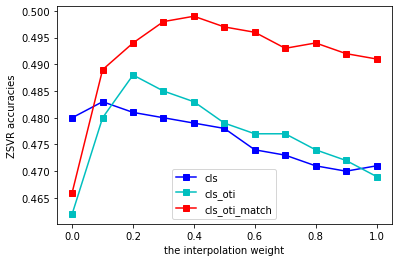

In [197]:
import matplotlib.pyplot as plt

#折线图
#点的横坐标
x_=x
k1 = res_hmdb51_1#线1的纵坐标
k2 = res_hmdb51_2#线2的纵坐标
k3=res_hmdb51_3
plt.plot(x_,k1,'s-',color = 'b',label="cls")#s-:方形
plt.plot(x,k2,'s-',color = 'c',label="cls_oti")#o-:圆形
plt.plot(x,k3,'s-',color = 'r',label="cls_oti_match")#o-:圆形
plt.xlabel("the interpolation weight")#横坐标名字
plt.ylabel("ZSVR accuracies")#纵坐标名字
plt.legend(loc = "best")#图例

# plt.show()
# plt.savefig('vitb-16-hmdb')

In [147]:
res_hmdb51_o1=[round(i,3) for i in res_hmdb51_o1]
res_hmdb51_c=[round(i,3) for i in res_hmdb51_c]

In [149]:
# len(res_hmdb51_o1)

11

In [150]:
import os
import pandas as pd

# path = 'data/train/'
# img_list=[]
# lable_list=[]
# testList = os.listdir(path)
# for file in testList:
#     img_list.append(file)
#     label='aa'
#     lable_list.append(label)

df = pd.DataFrame({"weight": x,"hmdb51_otf": res_hmdb51_o1,"hmdb51_after":res_hmdb51_c})
df.to_csv('hmdb51.csv',index=False)



In [117]:
list(zip(res_hmdb51_o1,res_hmdb51_c))

[(tensor([0.4805]), 0.4804906887378067),
 (tensor([0.4826]), 0.4819686668637304),
 (tensor([0.4808]), 0.4798994974874372),
 (tensor([0.4803]), 0.47886491279929055),
 (tensor([0.4795]), 0.4733963937333727),
 (tensor([0.4781]), 0.4702926396689329),
 (tensor([0.4743]), 0.46659769435412357),
 (tensor([0.4732]), 0.4629027490393142),
 (tensor([0.4710]), 0.4578776234111735),
 (tensor([0.4704]), 0.4535914868459947),
 (tensor([0.4706]), 0.4472361809045226)]

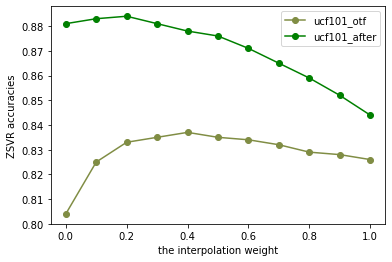

In [161]:
x_=x
k1 = res_ucf101_o#线1的纵坐标
k2 = res_ucf101_c#线2的纵坐标
plt.plot(x_,k1,'o-',color = '#808d44',label="ucf101_otf")#s-:方形
plt.plot(x_,k2,'o-',color = 'g',label="ucf101_after")#o-:圆形
plt.xlabel("the interpolation weight")#横坐标名字
plt.ylabel("ZSVR accuracies")#纵坐标名字
plt.legend(loc = "best")#图例
# plt.savefig('vitb-16-ucf')
plt.show()


In [160]:
res_ucf101_o=[round(i,3) for i in k1]
res_ucf101_c=[round(i,3) for i in k2]
df = pd.DataFrame({"weight": x,"ucf101_otf": res_ucf101_o,"ucf101_after":res_ucf101_c})
df.to_csv('ucf101_af.csv',index=False)


TypeError: type Tensor doesn't define __round__ method

In [159]:
res_ucf101_o=[round(i,3) for i in res_ucf101_o]
res_hmdb51_o=[round(i,3) for i in res_hmdb51_o1]
df = pd.DataFrame({"weight": x,"ucf101": res_ucf101_o,"hmdb51":res_hmdb51_o})
df.to_csv('vit_b_16.csv',index=False)

In [188]:
# res_ucf101_o=[round(i,3) for i in res_ucf101_o]
res_hmdb51_1=[round(i,3) for i in res_hmdb51_1]
res_hmdb51_2=[round(i,3) for i in res_hmdb51_2]
res_hmdb51_3=[round(i,3) for i in res_hmdb51_3]
df = pd.DataFrame({"weight": x,"1": res_hmdb51_1,"2":res_hmdb51_2,"3":res_hmdb51_3})
df.to_csv('3loss_hmdb51.csv',index=False)

### 置信度

In [ ]:
## 采用置信度的方式 

In [362]:
def get_accuracy_confidence(video_feas,cls_feas,before_video_feas,ratio):
#     coltrain=k400_visual_center[coltrain].mean(dim=1)
    simi_visual=(100*video_feas@cls_feas.T).softmax(dim=-1)
    similarity=(100*before_video_feas@cls_feas.T).softmax(dim=-1)
    simi_videos=simi_visual.softmax(dim=-1).topk(1)
    simi_before_vi=similarity.softmax(dim=-1).topk(1)
#     print(simi_videos)
    values=torch.hstack((simi_videos.values,simi_before_vi.values))## 4*2
    indices=torch.hstack((simi_videos.indices,simi_before_vi.indices))## 4*2
    ind=torch.argmax(values,dim=1)
    re=indices.transpose(1,0)[ind][0]
    re=re.unsqueeze(dim=1)
    return re

In [363]:
res=get_accuracy_confidence(video_ucf101,ucf101,before_video_ucf101,ratio)
trueratio=sum(res==ucf_true_label).numpy()[0]/video_ucf101.shape[0]

In [364]:
trueratio

0.7778278503830555

### T-SNE 可视化

In [331]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [338]:
import pandas as pd

In [321]:
tsne=TSNE(n_components=2)

In [352]:
X_tsne=tsne.fit_transform(video_ucf101[:3000])

/workdir/anaconda3/envs/torch1.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/workdir/anaconda3/envs/torch1.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [353]:
label_hmdb=ucf_true_label.numpy()[:3000]

In [323]:
X_tsne

array([[-80.96204   , -34.333317  ],
       [-10.240953  ,  -1.8702482 ],
       [-78.265526  , -33.559685  ],
       ...,
       [  0.65615404,  62.260098  ],
       [ 75.81215   ,  -0.7610053 ],
       [-32.726646  ,  10.00664   ]], dtype=float32)

In [325]:
label_hmdb

array([[31],
       [50],
       [31],
       ...,
       [16],
       [ 8],
       [ 6]])

In [354]:
X_tsne_data=np.hstack((X_tsne,label_hmdb))

In [355]:
df_sne=pd.DataFrame(X_tsne_data,columns=['dim1','dim2','class'])

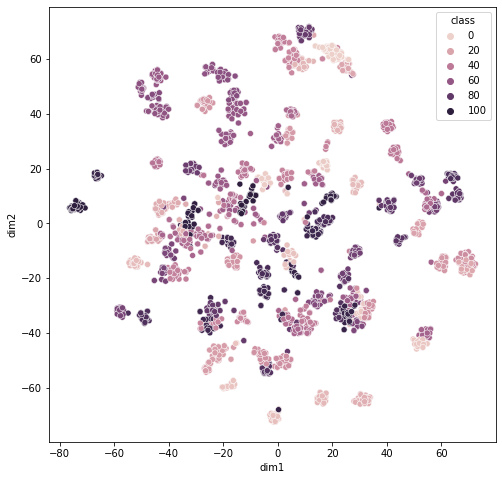

In [356]:
plt.figure(figsize=(8, 8)) 
sns.scatterplot(data=df_sne,hue='class',x='dim1',y='dim2') 
plt.show()

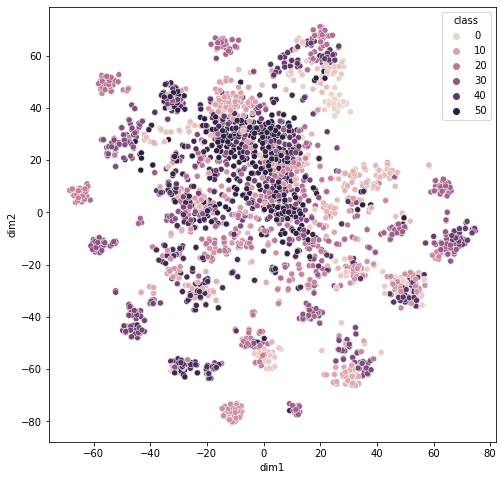

In [351]:
plt.figure(figsize=(8, 8)) 
sns.scatterplot(data=df_sne,hue='class',x='dim1',y='dim2') 
plt.show()

In [393]:
a=torch.randint(5,6,(1,))

In [395]:
a=a/10

In [397]:
a.requires_grad=True

In [398]:
a

tensor([0.5000], requires_grad=True)

In [399]:
torch.randint(0,1,(1,))

tensor([0])

In [400]:
a.device

device(type='cpu')

In [404]:
ucf101.shape

torch.Size([101, 512])

## 已知类别和未知类别的熵

In [589]:
simi_ucf101=(100*ucf101@k400.T).softmax(dim=-1)

In [590]:
simi_hmdb51=(100*hmdb51@k400.T).softmax(dim=-1)

In [425]:
re=torch.log(simi_ucf101)*simi_ucf101

In [428]:
# re[0]

In [423]:
torch.sum(torch.where(torch.isnan(re),torch.full_like(re,0),re))

tensor(-3.7702e-08)

In [593]:
def getentropy(simi_ma):
    re=-torch.log(simi_ma)*simi_ma
    all_en=torch.sum(torch.where(torch.isnan(re),torch.full_like(re,0),re),dim=1)
    print(sum(all_en))
    return torch.mean(all_en)
#     return all_en/simi_ma.shape[0]

In [594]:
getentropy(simi_ucf101)

tensor(10.3741)


tensor(0.1027)

In [595]:
getentropy(simi_hmdb51)

tensor(3.5084)


tensor(0.0688)

## seen classes and unseen classes

In [266]:
## 为k400选择最为相似的未知类别
def get_simi_k400(k400_cls,unseen_cls):
    simi=(100*k400_cls@unseen_cls.T).softmax(dim=-1)# 400*n
    indice=simi.topk(1).indices
    values=simi.topk(1).values
    return indice,values

# 已知类别去合成未知类别

# 已知类别去分类视频，已知类别最相似未知类别，作为视频的结果 1种预测， 400 多对1  top3个未知类，

# 未知类分类器 2种预测，比较好 top3

# before、after之间 L2 loss （before+after）/2. == after -> before=after  L2优先

# 2个top3 综合排序，比如 1 a\b\c 2 b\c\a 

# 不能准备视频的类别，两种


# 1.before > after,联合损失 ，权值，20个epoch  优先 after>48.5
# 2.融合预测 相似度，before after 投票   现在测--》投票 

# 3.论文、框架


In [267]:
inds,value=get_simi_k400(k400,hmdb51)

In [720]:
keys_un={}
for now_id,ind in enumerate(inds):
    keys_un.setdefault(int(ind[0]),[]).append(now_id)

In [742]:
simi=(100*hmdb51@k400.T).softmax(dim=-1).topk(2).indices

In [747]:
simi[27]

tensor([396, 150])

In [743]:
for ids,ind in enumerate(simi):
    if ids not in keys_un.keys():
        keys_un.setdefault(ids,[]).append(int(ind))

In [751]:
keys_un[27]

[396]

In [706]:
pre_inds=(100*video_ucf101@k400.T).softmax(dim=-1).topk(1).indices
pre_vals=(100*video_ucf101@k400.T).softmax(dim=-1).topk(1).values
pre_inds_un=inds[pre_inds.squeeze()]

In [686]:
pre_uninds=(100*video_ucf101@ucf101.T).softmax(dim=-1).topk(1).indices
pre_unvals=(100*video_ucf101@ucf101.T).softmax(dim=-1).topk(1).values

In [753]:
sum(pre_uninds==pre_inds_un)

tensor([7011])

In [757]:
(7011+1002)/13314

0.6018476791347454

In [755]:
n=pre_inds.shape[0]
count=0
for i in range(n):
    if pre_uninds[i]!=pre_inds_un[i]:
        if pre_unvals[i]> pre_vals[i]:
            pre=pre_uninds[i]
        else:
            pre=pre_inds_un[i]
        if pre==ucf_true_label[i]:
            count+=1

In [756]:
count

1002

In [665]:
n=pre_inds.shape[0]
count=0
for i in range(n):
    if labels_ucf101[:,0][i] in pre_inds[i]:
        count+=1

In [78]:
def get_joint_forecast(ratio,video_fea,before_video_fea,true_label,seen_cls,unseen_cls,seen_unseen):
    end_tensor=(1-ratio)*before_video_fea+ratio*video_fea
    video_seen=(100*end_tensor@seen_cls.T).softmax(dim=-1).topk(1).indices
    pre_seen=seen_unseen[video_seen.squeeze()]
    pre_unseen=(100*end_tensor@unseen_cls.T).softmax(dim=-1).topk(1).indices
    
    seen=sum(pre_seen==true_label)/video_fea.shape[0]
    unseen=sum(pre_unseen==true_label)/video_fea.shape[0]
    joint=sum((pre_unseen==true_label) | (pre_seen==true_label))/video_fea.shape[0]
    return seen,unseen,joint

In [82]:
get_joint_forecast(1,video_ucf101,before_video_ucf101,ucf_true_label,k400,ucf101,inds)

(tensor([0.5432]), tensor([0.7910]), tensor([0.8292]))

## 投票

In [26]:
def get_simi_k400(k400_cls,unseen_cls):
    simi=(100*k400_cls@unseen_cls.T).softmax(dim=-1)# 400*n
    indice=simi.topk(1).indices
    values=simi.topk(1).values
    return indice,values

In [928]:
## 1种分类
pre_inds=(100*video_ucf101@k400.T).softmax(dim=-1).topk(1).indices
pre_vals=(100*video_ucf101@k400.T).softmax(dim=-1).topk(1).values
pre_inds_un=inds[pre_inds.squeeze()]

In [926]:
## 时序后分类
after_temporl=(100*video_ucf101@ucf101.T).softmax(dim=-1).topk(1).indices

In [925]:
## 时序前分类
before_temporl=(100*before_video_ucf101@ucf101.T).softmax(dim=-1).topk(1).indices

In [931]:
## 联合
joint_tem=(100*(0.7*video_ucf101+0.3*before_video_ucf101)@ucf101.T).softmax(dim=-1).topk(1).indices

In [647]:
def get_orthogonal_num_vec(now_tensor,best_tensor,ratio):
    l2sums=torch.norm(best_tensor,dim=1)**2
    l2sums=torch.unsqueeze(l2sums,dim=1)
    maps=(now_tensor*best_tensor)/l2sums
    maps*=best_tensor 
    gain=now_tensor-maps
    res=best_tensor+gain
    return res

In [1200]:
def get_cls(video_fea,before_video_fea,unseen,seen,ratio):
    inds,value=get_simi_k400(seen,unseen)
    ## 1种分类
    pre_inds=(100*video_fea@seen.T).softmax(dim=-1).topk(1).indices
    pre_inds_un=inds[pre_inds.squeeze()]
    ## 2种分类 时序后
#     after_temporl=(100*video_fea@unseen.T).softmax(dim=-1).topk(1).indices
#     after_temporl=(100*(ratio*video_fea+(1-ratio)*before_video_fea)@unseen.T).softmax(dim=-1).topk(1).indices
    after_temporl=(100*(before_video_fea+ratio*(video_fea-before_video_fea))@unseen.T).softmax(dim=-1).topk(1).indices
    ## 3时序前
    before_temporl=(100*before_video_fea@unseen.T).softmax(dim=-1).topk(1).indices
    ## 4联合
    
    before_gain=get_orthogonal_gain_ratio(video_fea,before_video_fea,0.4)
    before_gain=(100*before_gain@unseen.T).softmax(dim=-1).topk(1).indices
    
    return pre_inds_un,after_temporl,before_temporl,before_gain
    
    
    

In [1201]:
inds,value=get_simi_k400(k400,hmdb51)
cls1,cls2,cls3,cls4=get_cls(video_hmdb51,before_video_hmdb51,hmdb51,k400,0.3)

In [1136]:
inds,value=get_simi_k400(k400,ucf101)
cls1,cls2,cls3,cls4=get_cls(video_ucf101,before_video_ucf101,ucf101,k400,0.5)

In [1214]:
n=cls1.shape[0]
count=0
one_ti=0
for i in range(n):
#     be=cls3[i]
    af=cls2[i]
#     se_unse=cls1[i]
    joint=cls4[i]
    re=[0]*hmdb51.shape[0]
#     re[be]+=1
    re[af]+=1
#     re[se_unse]+=1
    re[joint]+=1
    if max(re)==1:
        one_ti+=1
        if hmdb_true_label[i] == joint:
            count+=1
    else:        
        pre=re.index(max(re))
        if pre==hmdb_true_label[i]:
            count+=1

In [1215]:
count/n

0.4989654153118534

In [1137]:
n=cls1.shape[0]
count=0
one_ti=0
for i in range(n):
    be=cls3[i]
    af=cls2[i]
    se_unse=cls1[i]
    joint=cls4[i]
    re=[0]*ucf101.shape[0]
    re[be]+=1
    re[af]+=1
    re[se_unse]+=1
    re[joint]+=1
    if max(re)==1:
        one_ti+=1
        if ucf_true_label[i] == af:
            count+=1
    else:        
        pre=re.index(max(re))
        if pre==ucf_true_label[i]:
            count+=1

In [1138]:
count/n

0.788418206399279

In [ ]:
1\2\4 joint 77.4% -->ucf101 
1\2\3\4 joint 77% af 77% be 77%
1\2\4 joint 44.9% af 45% se_unse 43.6%-->hmdb51 
1\2\3\4 joint 45.3% af 45.5% be 45.3% -->hmdb51


In [ ]:
3部分投票：时序前、时序后、已知类到未知类
ucf101:
    当1为最大票数时，将视频分类为 af预测的结果
    当1不为最大票数时，将视频分类为票数最多的结果
    投票结果： 77.3%
hmdb51:
    当1为最大票数时，将视频分类为 af预测的结果
    当1不为最大票数时，将视频分类为票数最多的结果
    投票结果： 49.2%
4部分投票：时序前、时序后、已知类到未知类、时序前和时序后联合-->效果差
ucf101：
    

## only Ratio Loss

In [1004]:
from transformers import

## NCE loss

In [119]:
import numpy as np
import torch.nn.functional as F

In [109]:
def gen_label(labels):
    num = len(labels)
    gt = np.zeros(shape=(num,num))
    for i, label in enumerate(labels):
        for k in range(num):
            if labels[k] == label:
                gt[i,k] = 1
    return gt

In [110]:
labels=np.random.randint(0,51,(8,1))

In [111]:
labels

array([[12],
       [13],
       [10],
       [11],
       [17],
       [ 5],
       [23],
       [46]])

In [112]:
ground_true=gen_label(labels)

In [113]:
ground_true

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [114]:
import torch.nn as nn

class NCELoss(nn.Module):
    """Loss that uses a 'hinge' on the lower bound.
    This means that for samples with a label value smaller than the threshold, the loss is zero if the prediction is
    also smaller than that threshold.
    args:
        error_matric:  What base loss to use (MSE by default).
        threshold:  Threshold to use for the hinge.
        clip:  Clip the loss if it is above this value.
    """

    def __init__(self, error_metric=nn.KLDivLoss(reduction='mean')):
        super().__init__()
        print('=========using NCE Loss==========')
        self.error_metric = error_metric

    def forward(self, prediction, label):
        batch_size = len(prediction)
        probs1 = F.log_softmax(prediction, 1)
        probs2 = F.softmax(label * 10, 1)
        loss = self.error_metric(probs1, probs2) * batch_size
        return loss

In [115]:
image=torch.randn((8,512))

In [122]:
text=torch.randn((8,512))

In [123]:
log_pre_image=image@text.T
log_pre_text=log_pre_image.T

In [116]:
ground_true=torch.Tensor(ground_true)

In [121]:
ground_true.shape

torch.Size([8, 8])

In [117]:
loss=NCELoss()

=========using NCE Loss==========


In [124]:
loss(log_pre_image,ground_true)

/workdir/anaconda3/envs/torch1.7/lib/python3.7/site-packages/torch/nn/functional.py:2905: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


tensor(45.9280)

In [125]:
probs2 = F.softmax(ground_true * 10, 1)

In [126]:
probs2

tensor([[9.9968e-01, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05,
         4.5386e-05, 4.5386e-05],
        [4.5386e-05, 9.9968e-01, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05,
         4.5386e-05, 4.5386e-05],
        [4.5386e-05, 4.5386e-05, 9.9968e-01, 4.5386e-05, 4.5386e-05, 4.5386e-05,
         4.5386e-05, 4.5386e-05],
        [4.5386e-05, 4.5386e-05, 4.5386e-05, 9.9968e-01, 4.5386e-05, 4.5386e-05,
         4.5386e-05, 4.5386e-05],
        [4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 9.9968e-01, 4.5386e-05,
         4.5386e-05, 4.5386e-05],
        [4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 9.9968e-01,
         4.5386e-05, 4.5386e-05],
        [4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05,
         9.9968e-01, 4.5386e-05],
        [4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05, 4.5386e-05,
         4.5386e-05, 9.9968e-01]])

## k600 视频帧数

In [385]:
path='../../import_preimage/data/k600_split_three.txt'

In [386]:
datas=[i.strip().split(',') for i in open(path).readlines()]

In [387]:
for ind,data in enumerate(datas):
    if int(data[1])<24:
        print(datas[ind])

['crossing eyes/xDdFnEMQsVQ_000000_000010', '11', '35']
['falling off chair/m8csO2BAy_Y_000000_000010', '15', '43']
['playing polo/tyC6rwOy5zQ_000000_000010', '0', '99']
['playing polo/vOtC-tEyKXM_000050_000060', '0', '99']
['playing polo/veVlqCj7Imc_000059_000069', '0', '99']
['playing polo/wFhFYJdYY7M_000027_000037', '0', '99']
['pouring beer/84yFvPZwAm8_000000_000010', '10', '102']
['raising eyebrows/pkJLLdrZpJ4_000000_000010', '15', '111']
['shuffling feet/HDxEdTCNEiw_000000_000010', '23', '121']
['watching tv/ECqO26EwBTY_000000_000010', '19', '155']


In [379]:
datas[2536]

['crossing eyes/xDdFnEMQsVQ_000000_000010', '11', '29']

In [177]:
import os

In [178]:
len(os.listdir('../../kinetics400_frames/'))

400

In [179]:
count=0
root='../../kinetics400_frames/'
for ac in os.listdir(root):
    count+=len(os.listdir(os.path.join(root,ac)))
#     for vc in :
#         count+=len(os.li)
count

254380

In [180]:
loss=torch.nn.MSELoss()

In [181]:
a=torch.randn((2,512))
b=torch.randn((2,512))

In [347]:
import random
import numpy as np

In [348]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

In [349]:
setup_seed(1024)

## hmdb与ucf101--0/50

In [1029]:
import numpy as np

In [1109]:
def accuracy(output, target, topk=(1, )):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [1110]:
def compute_accuracy(vis_emb, text_emb, label):
    n_class = len(text_emb)
    n_samples = len(vis_emb)
    similarity=(100.0 * vis_emb @ text_emb.T)
    similarity=similarity.view(n_samples, -1, n_class).softmax(dim = -1)
    similarity=similarity.mean(dim = 1, keepdim = False)  # b 101
    prec=accuracy(similarity, label, topk = (1, 5))
    return prec[0], prec[1]

In [1111]:
def multi_split_test(vis_embs, text_embs, true_label):
    full_acc1, full_acc5 = compute_accuracy(vis_embs, text_embs, true_label)
 
    # Calculate accuracy per split
    # Only when the model has been trained on a different dataset
    true_label = true_label.numpy()
    accuracy_split, accuracy_split_top5 = np.zeros(10), np.zeros(10)
    for split in range(len(accuracy_split)):
        np.random.seed(split)
        sel_classes = np.random.permutation(len(text_embs))[:len(text_embs) // 2]  # 一半的类别
        sel = [l in sel_classes for l in true_label]  # 判断每一条视频的标签是否在测试的类别内
        subclasses = np.unique(true_label[sel])## 测试的类别标签
        #### 标签映射
        tl = np.array([int(np.where(l == subclasses)[0]) for l in true_label[sel]])## true_label[sel] 视频数
        tl = torch.from_numpy(tl)## 原始相对所有类别的标签--》相对于一半类别的标签
        acc, acc5 = compute_accuracy(vis_embs[sel], text_embs[subclasses], tl)
        accuracy_split[split] = acc
        accuracy_split_top5[split] = acc5
    
    return accuracy_split, accuracy_split_top5

In [1194]:
def get_orthogonal_gain_ratio(now_tensor,best_tensor,ratio):
    l2sums=torch.norm(best_tensor,dim=1)**2
    l2sums=torch.unsqueeze(l2sums,dim=1)
    maps=(now_tensor*best_tensor)/l2sums
    maps*=best_tensor 
    gain=now_tensor-maps
    res=best_tensor+gain*ratio
    return res

In [1278]:
video=before_video_hmdb51+0.4*(video_hmdb51-before_video_hmdb51)

In [1406]:
video=get_orthogonal_gain_ratio(video_hmdb51,before_video_hmdb51,0.4)

In [1407]:
topk1,_=multi_split_test(video,hmdb51,hmdb_true_label)

In [1408]:
print('Top1: mean {:.03f}%, std {:.03f}%'.format(np.mean(topk1),np.std(topk1)))

Top1: mean 62.972%, std 5.800%


In [1397]:
# video=before_video_ucf101+0.5*(video_ucf101-before_video_ucf101)
video=get_orthogonal_gain_ratio(video_ucf101,before_video_ucf101,0.8)
topk1,_=multi_split_test(video,ucf101,ucf_true_label)
print('Top1: mean {:.03f}%, std {:.03f}%'.format(np.mean(topk1),np.std(topk1)))

Top1: mean 92.542%, std 2.342%


## 模型的参数量统计

In [106]:
def get_parameter_number(model):
    total_num = sum(p.numel() for p in model.parameters())
    trainable_num = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return {'Total': total_num, 'Trainable': trainable_num}


In [383]:

checkpoint = torch.load('../records/exp_zero_shot/k400/ViT-B/32/mm_ftf/ViT-B-32_epoch4_model_one_tem.pt', map_location='cpu')

In [384]:
checkpoint.keys()

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict'])

In [385]:
weights=checkpoint['model_state_dict']

In [390]:
"textual.ctx" in weights.keys()

False

In [393]:
weights['prompt_learner.token_suffix'].shape

torch.Size([400, 71, 512])

In [46]:
allparameters=0
maxs=0
for key,value in weights.items():
#     maxs=max(maxs,len(value.shape))
#     print(maxs)
    shape_num=len(value.shape)
    if shape_num==0:
        allparameters+=1
    else:
        now=1
        for i in range(shape_num):
            now*=value.shape[i]
        allparameters+=now
        

In [47]:
allparameters/1000000

346.552577

In [25]:
value.size()==torch.Size([])

True

In [27]:
allparameters

1

In [34]:
len(weights['visual.transformer.resblocks.0.attn.in_proj_weight'].shape)

2

In [388]:
weights.keys()

odict_keys(['logit_scale', 'visual.class_embedding', 'visual.positional_embedding', 'visual.proj', 'visual.conv1.weight', 'visual.ln_pre.weight', 'visual.ln_pre.bias', 'visual.transformer.resblocks.0.attn.in_proj_weight', 'visual.transformer.resblocks.0.attn.in_proj_bias', 'visual.transformer.resblocks.0.attn.out_proj.weight', 'visual.transformer.resblocks.0.attn.out_proj.bias', 'visual.transformer.resblocks.0.ln_1.weight', 'visual.transformer.resblocks.0.ln_1.bias', 'visual.transformer.resblocks.0.mlp.c_fc.weight', 'visual.transformer.resblocks.0.mlp.c_fc.bias', 'visual.transformer.resblocks.0.mlp.c_proj.weight', 'visual.transformer.resblocks.0.mlp.c_proj.bias', 'visual.transformer.resblocks.0.ln_2.weight', 'visual.transformer.resblocks.0.ln_2.bias', 'visual.transformer.resblocks.1.attn.in_proj_weight', 'visual.transformer.resblocks.1.attn.in_proj_bias', 'visual.transformer.resblocks.1.attn.out_proj.weight', 'visual.transformer.resblocks.1.attn.out_proj.bias', 'visual.transformer.resb

In [240]:
a=torch.randn((2,10))

In [242]:
a=a/a.norm(dim=-1,keepdim=True)

In [243]:
a

tensor([[ 0.2386, -0.0256,  0.2499,  0.0109, -0.0549, -0.0212, -0.6811, -0.6102,
         -0.1766,  0.0946],
        [-0.6745, -0.1738, -0.0689,  0.5017,  0.3369, -0.0620, -0.2402,  0.0727,
          0.2684, -0.0775]])

In [244]:
a=a/a.norm(dim=-1,keepdim=True)
a

tensor([[ 0.2386, -0.0256,  0.2499,  0.0109, -0.0549, -0.0212, -0.6811, -0.6102,
         -0.1766,  0.0946],
        [-0.6745, -0.1738, -0.0689,  0.5017,  0.3369, -0.0620, -0.2402,  0.0727,
          0.2684, -0.0775]])

In [100]:
import numpy as np

In [99]:
indexs = sorted(np.random.choice(64, 8, replace=False))

NameError: name 'np' is not defined

In [104]:
inter=65//8

In [105]:
inter

8

In [110]:
np.arange(64)[::inter][:inter]

array([ 0,  8, 16, 24, 32, 40, 48, 56])

In [112]:
inter=75//8
indexs=np.arange(75)[::inter][:8]

In [113]:
indexs


array([ 0,  9, 18, 27, 36, 45, 54, 63])

In [ ]:
self.indices[i] for i in torch.randperm(len(sindexs))

In [213]:
torch.randperm(10)

tensor([0, 5, 9, 7, 8, 1, 4, 2, 6, 3])

In [214]:
indices = np.arange(64) 

In [215]:
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [22]:
def generateMatrix( n) :
    nums=[i for i in range(1,n**2+1)]
    print(nums)

    res=[[0]*n for _ in range(n)]
    top,bottom,left,right=0,n-1,0,n-1
    while top<bottom and left<right:
        for j in range(left,right+1):
            res[top][j]=nums.pop(0)
        top+=1
        for i in range(top,bottom+1):
            res[i][right]=nums.pop(0)
        right-=1
        for j in range(right,left-1,-1):
            res[bottom][j]=nums.pop(0)
        bottom-=1
        for i in range(bottom,top-1,-1):
            res[i][left]=nums.pop(0)
        left+=1
    if n%2:
        res[n//2][n//2]=nums.pop(0)
    return res

In [23]:
generateMatrix(4)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


[[1, 2, 3, 4], [12, 13, 14, 5], [11, 16, 15, 6], [10, 9, 8, 7]]

In [24]:
def multi1(a,n):
    res=1
    while n:
        if n%2:
            res*=a
        a*=a
        n//=2
    return res

In [28]:
multi1(2,3)

8

In [29]:
dirr={}
dirr.setdefault(2,1)

1

In [30]:
dirr

{2: 1}

In [32]:
''.join(sorted('acb'))

'abc'

In [33]:
import collections

In [39]:
def findAnagrams(s, p):
    ## 暴力法
    n, k = len(s), len(p)
    ans = []
    i = 0
    curcnt, cnt = collections.Counter(s[:k]), collections.Counter(p)
    print(curcnt,cnt)
    while i < n-k:
        if curcnt == cnt:
            ans.append(i)
        curcnt[s[i]] -= 1
        #print(curcnt[s[i]])
        curcnt[s[i+k]] += 1
        print(curcnt)
        i += 1
    
    if curcnt == cnt:
        ans.append(i)
    return ans



In [40]:
findAnagrams('cbaebabacd','abc')

Counter({'c': 1, 'b': 1, 'a': 1}) Counter({'a': 1, 'b': 1, 'c': 1})


[0]